# Introduction
Proyek analisis data ini dilakukan dengan menggunakan dataset Supermart Grocery Sales. Ini adalah kumpulan data umum dengan sekitar 10 ribu entri dan 11 kolom, dan dimaksudkan untuk digunakan sebagai kumpulan data praktik.

Dokumentasi Dataset bisa dilihat pada https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.stats.weightstats import ztest
from scipy.stats import linregress
%matplotlib inline

In [2]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## Cleaning Dataset
Langkah - langkah :
1. Mengganti nama kolom yang memiliki spaci dan huruf kapital
2. Mengecek tipe data tiap kolomnya
3. Cek dan Mengatasi N/A serta data duplikat
4. Cek apakah ada anomali baik kesalahan input data atau yang lainya

**Renaming Columns**

In [3]:
rename_dict = {'Order ID':'order_id',
               'Customer Name':'customer_name',
               'Category':'category',
               'Sub Category':'sub_category',
               'City':'city',
               'Order Date':'order_date',
               'Region':'region',
               'Sales':'sale_price',
               'Discount':'discount',
               'Profit':'profit',
               'State':'state'
              }

df = df.rename(columns=rename_dict).copy()

**cek information Columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_name  9994 non-null   object 
 2   category       9994 non-null   object 
 3   sub_category   9994 non-null   object 
 4   city           9994 non-null   object 
 5   order_date     9994 non-null   object 
 6   region         9994 non-null   object 
 7   sale_price     9994 non-null   int64  
 8   discount       9994 non-null   float64
 9   profit         9994 non-null   float64
 10  state          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df.order_date 

0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: order_date, Length: 9994, dtype: object

Tanggal pemesanan tidak dikenali sebagai objek datetime. Kolom tersebut perlu dikonversi ke kolom objek datetime.

Selain itu perlu membentuk kolom baru yaitu bulan dan tahun karena dari berbagai sumber bacaan dan yang saya pelajari kolom tersebut akan bermanfaat

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'])

df['year'] = df['order_date'].apply(lambda x : x.year)
df['month'] = df['order_date'].apply(lambda x : x.month)

In [7]:
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit,state,year,month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10


**Check Missing Value & Duplicate**

In [8]:
df.isna().all()

order_id         False
customer_name    False
category         False
sub_category     False
city             False
order_date       False
region           False
sale_price       False
discount         False
profit           False
state            False
year             False
month            False
dtype: bool

In [9]:
df.duplicated().sum()

0

**Checking for weird values or any error in data**

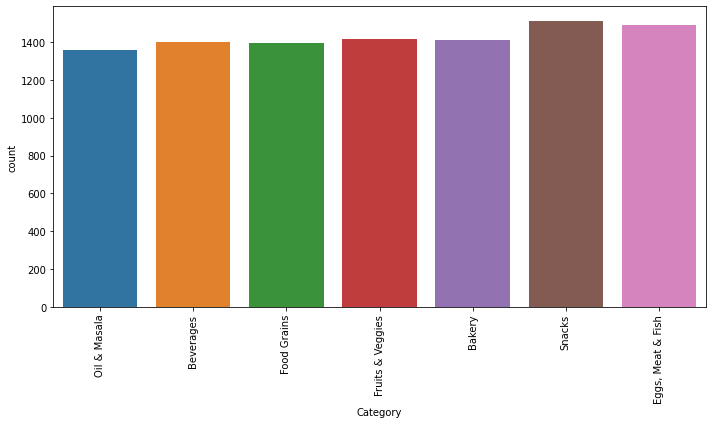

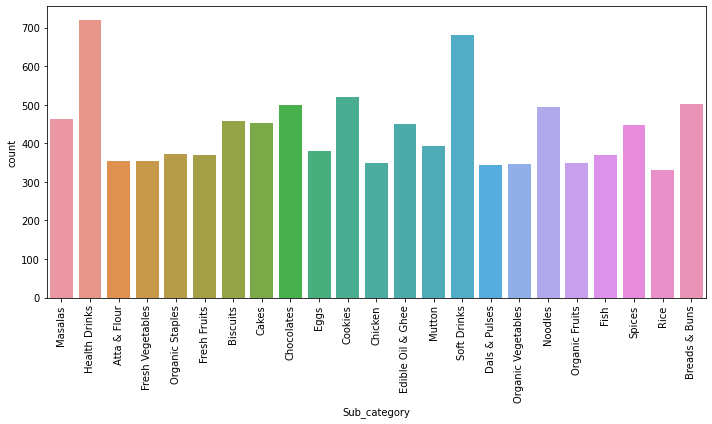

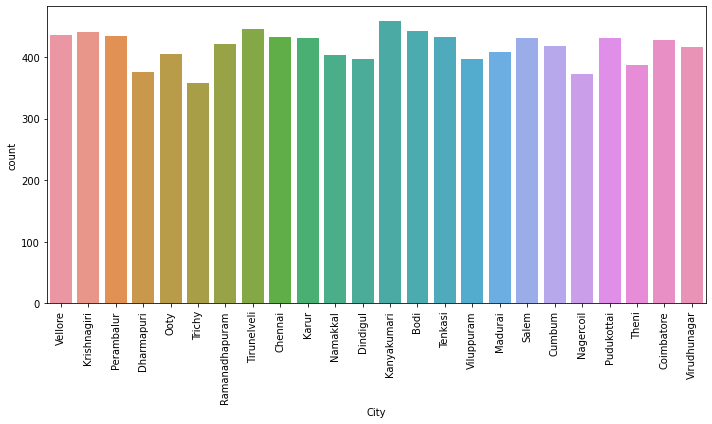

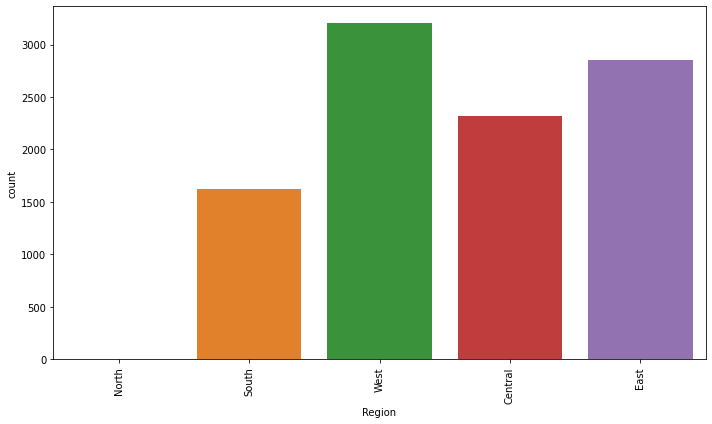

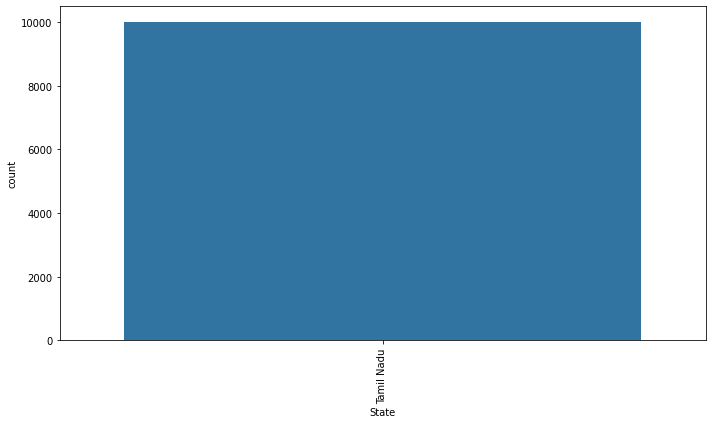

In [5]:
categorical_columns = ['category','sub_category','city','region', 'state']

def plot_all_hist(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.xlabel(col.capitalize())
        plt.xticks(rotation='90')
        plt.tight_layout()
        plt.show()

plot_all_hist(df, categorical_columns)

In [6]:
df['region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: region, dtype: int64

Dari hasil visualisasi  ditemukan:
1. Didalam kolom `region` terdapat nilai `North` dimana hanya terdapat 1 dan ini merupakan outlier sehingga saya putuskan akan mengapusnya. Meskipun data `Time Series` namun baris tersebut berada di awal index jadi tidak akan mempengaruhi data yang lainya
2. Ditemukan juga pada kolom `country` dimana hanya terdapat satu negara yaitu `Tamil Nadu` maka saya putuskan untuk mengapus kolom ini karena tidak terlalu berpengaruh juga

In [8]:
# Removing the state column
df_clean = df.drop(columns=['state']).copy()

# Removing the row of data that contains region == North
index_to_remove = df[df.region == 'North'].index.values
df_clean = df_clean.drop(index = index_to_remove).copy().reset_index(drop=True)

In [9]:
print(df_clean.columns)
df_clean.region.unique()

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sale_price', 'discount', 'profit', 'year',
       'month'],
      dtype='object')


array(['South', 'West', 'Central', 'East'], dtype=object)

**Check anomali in Numerical Column**

In [10]:
num_cols = ['sale_price','discount','profit']

df_clean[num_cols].describe()

,sale_price,discount,profit
count,9993.000000,9993.000000,9993.000000
mean,1496.620434,0.226828,374.934446
std,577.582837,0.074632,239.944743
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.000000
50%,1498.000000,0.230000,320.760000
75%,1995.000000,0.290000,525.690000
max,2500.000000,0.350000,1120.950000


Tidak ada nilai negatif dalam data, artinya penjualan dan laba tidak mengalami kerugian

### Adding Feature
Disini saya juga membuat kolom baru yaitu `original_price` dan `discount_amount` karena asumsi saya adanya kolom tersebut akan bermanfaat 

In [11]:
df_clean['original_price'] = df_clean['sale_price']/(1- df_clean['discount'])
df_clean['discount_amount'] = df_clean['original_price'] - df_clean['sale_price']
df_clean.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit,year,month,original_price,discount_amount
0,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,2017,11,913.414634,164.414634
1,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,2017,6,2987.341772,627.341772
2,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,2016,10,1194.666667,298.666667
3,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,2016,10,3182.432432,827.432432
4,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,2015,6,3114.864865,809.864865


## Exploratory data Analysist
Tujuan langkah ini:
1. Melihat distribusi data dari `Sales, Discount danProfit`
2. Trend `Sales dan Profit`
3. Mencari hubungan antara `Discount Amount dan Profit`

In [37]:
plt.style.use('seaborn-darkgrid')
def plot_num_hist(columns):
    for col in columns:  
        print(f'The stats for {col} are as follows:')
        print(df_clean[columns].describe())
        print("")
        print(f'The histogram for {col} is shown below:')
        plt.figure(figsize=(10,6))
        sns.histplot(df_clean[col], bins=50, color='green')
        plt.title(col.capitalize() + " Distribution")
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.axvline(df_clean[col].mean(), color='yellow', linestyle='dashed', linewidth=3, label='mean = ' + "{:.2f}".format(df_clean[col].mean()))
        plt.axvline(df_clean[col].median(), color='red', linestyle='dashdot', linewidth=3, label='median = '+ "{:.2f}".format(df_clean[col].median()))
        plt.legend()
        plt.show()
        print('')

The stats for sale_price are as follows:
        sale_price       profit  discount_amount
count  9993.000000  9993.000000      9993.000000
mean   1496.620434   374.934446       456.878888
std     577.582837   239.944743       268.210361
min     500.000000    25.250000        55.666667
25%    1000.000000   180.000000       246.139535
50%    1498.000000   320.760000       398.296296
75%    1995.000000   525.690000       619.102564
max    2500.000000  1120.950000      1345.615385

The histogram for sale_price is shown below:


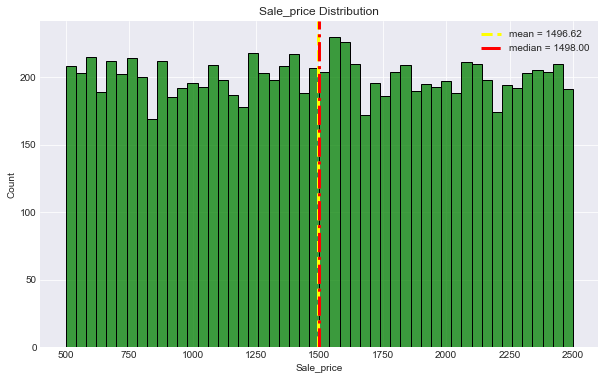


The stats for profit are as follows:
        sale_price       profit  discount_amount
count  9993.000000  9993.000000      9993.000000
mean   1496.620434   374.934446       456.878888
std     577.582837   239.944743       268.210361
min     500.000000    25.250000        55.666667
25%    1000.000000   180.000000       246.139535
50%    1498.000000   320.760000       398.296296
75%    1995.000000   525.690000       619.102564
max    2500.000000  1120.950000      1345.615385

The histogram for profit is shown below:


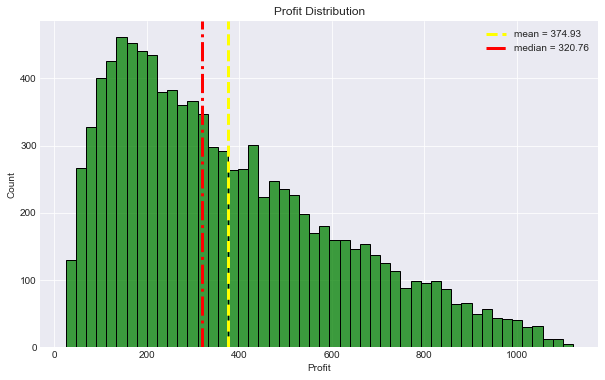


The stats for discount_amount are as follows:
        sale_price       profit  discount_amount
count  9993.000000  9993.000000      9993.000000
mean   1496.620434   374.934446       456.878888
std     577.582837   239.944743       268.210361
min     500.000000    25.250000        55.666667
25%    1000.000000   180.000000       246.139535
50%    1498.000000   320.760000       398.296296
75%    1995.000000   525.690000       619.102564
max    2500.000000  1120.950000      1345.615385

The histogram for discount_amount is shown below:


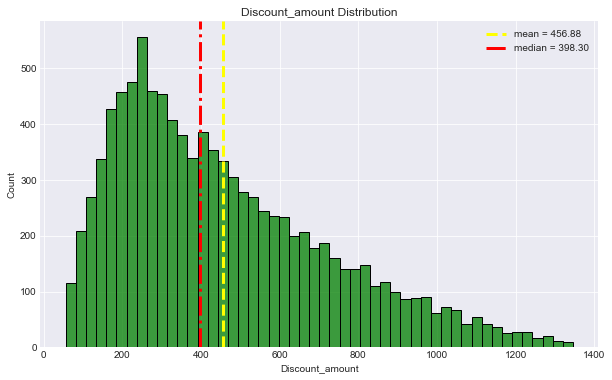

In [39]:
plot_num_hist(['sale_price', 'profit', 'discount_amount'])

### Sales amount and Sale count by year and month

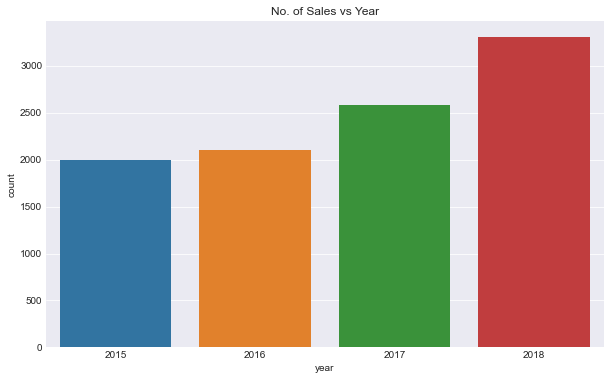

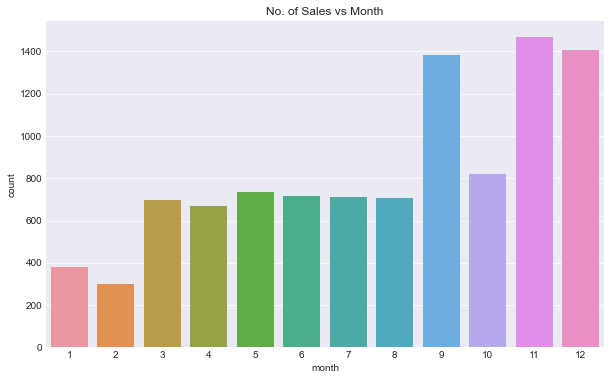

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='year')
plt.title('No. of Sales vs Year')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='month')
plt.title('No. of Sales vs Month')
plt.show()

Dari visualisasi tersebut ditemukan:
1. Adanya tren selama tahun penjualan tersebut
2. Dari trens tersebut ternyata penjualan relatif naik pada bulan `September, November, Desember` dan menurun di bulan `Januari` dan `Februari`

In [15]:
df_grouped_by_year = df_clean.groupby('year', as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                             profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'))
df_grouped_by_month = df_clean.groupby('month', as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                               profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'))

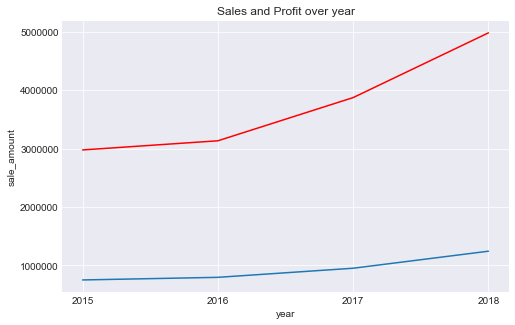

In [40]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_grouped_by_year, x='year', y='sale_amount', color='red')
sns.lineplot(data=df_grouped_by_year, x='year', y='profit_amount')
plt.xticks(ticks=[2015,2016,2017,2018])
plt.ticklabel_format(style='plain')
plt.title('Sales and Profit over year')
plt.show()

Ternyata ketika `sales_price` naik `profit` juga naik di setiap tahunya meskipun kenaikan `sales_price` cenderung lebih naik dibandingkan dengan `profit`

In [17]:
df_grouped_by_YM = df.groupby(['year','month'], as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                               profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'),
                                                                     sale_count = pd.NamedAgg(column='profit', aggfunc='count'))

df_grouped_by_YM['date'] = np.array(df_grouped_by_YM['year'].astype('str') +'-'+ df_grouped_by_YM ['month'].astype('str') + '-1', dtype=datetime.date)

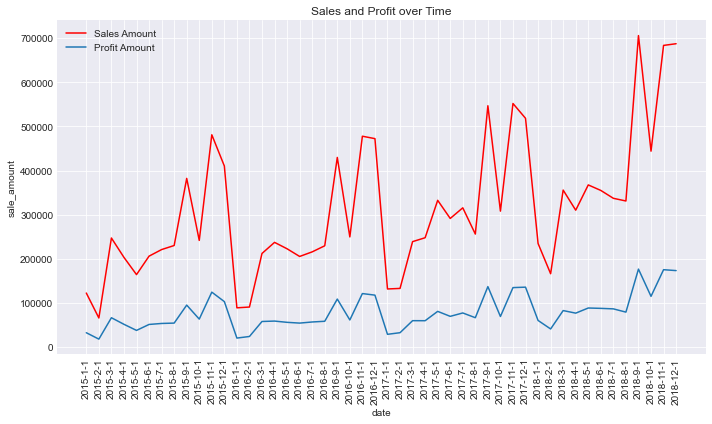

In [41]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped_by_YM, x='date', y='sale_amount', label='Sales Amount', color='red')
sns.lineplot(data=df_grouped_by_YM, x='date', y='profit_amount', label='Profit Amount')

plt.legend()
plt.xticks(rotation=90)
plt.title('Sales and Profit over Time')
plt.tight_layout()
plt.show()

Setelah di lihat berdasarkan bulannya ternyata kenaikan `profit` memang di pengaruhi tingkan `sales_price` nya. Selain itu terjadinya fluktuasi juga di akibatkan karena bulan-bulan dimana penjualan naik dan turun

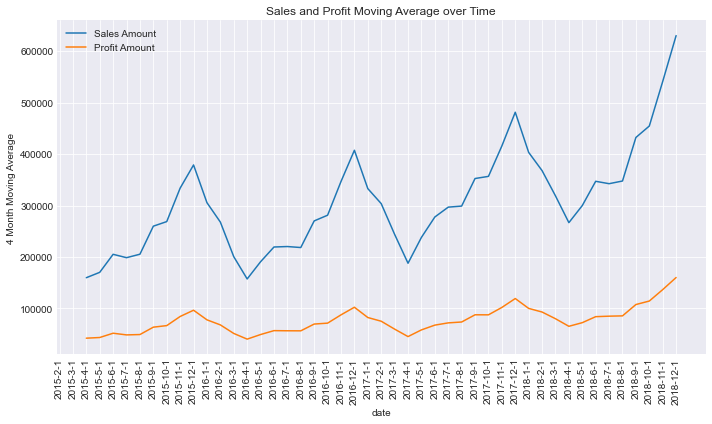

In [19]:
# Plot 4 bulan dengan - Moving Average 
df_grouped_by_YM['sale_MA'] = df_grouped_by_YM['sale_amount'].rolling(4).mean()
df_grouped_by_YM['profit_MA'] = df_grouped_by_YM['profit_amount'].rolling(4).mean()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped_by_YM, x='date', y='sale_MA', label='Sales Amount')
sns.lineplot(data=df_grouped_by_YM, x='date', y='profit_MA', label='Profit Amount')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('4 Month Moving Average')
plt.title('Sales and Profit Moving Average over Time')
plt.tight_layout()
plt.show()


Dari visualisasi ini kita ternyata memang penurunan terjadi di awal tahun dan kenaikan terjadi di akhir tahun

### Get Relationship
Dari visualisasi tersebut kita ketahui antar variabel memiliki hubungan, maka kita perlu mencari berapa nilai korelasinya

In [20]:
df_clean.columns

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sale_price', 'discount', 'profit', 'year',
       'month', 'original_price', 'discount_amount'],
      dtype='object')

<AxesSubplot:>

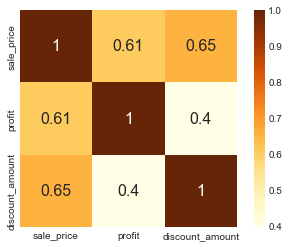

In [21]:
sns.heatmap(df_clean[['sale_price','profit','discount_amount']].corr(), cmap='YlOrBr', square=True, annot=True, annot_kws={"size":16})

Dilihat dari korelasi ditemukan hal berikut:
1. Korelasi antara `profit` dengan `sale_price` = 61%
2. Korelasi antara `profit` dengan `discount_amount` = 4%

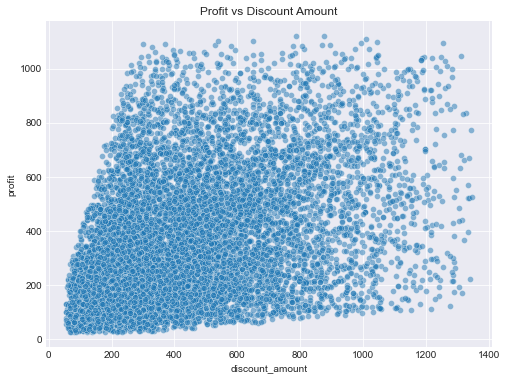

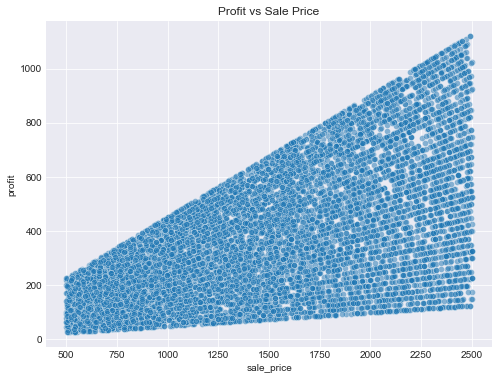

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, y='profit', x='discount_amount', alpha=0.5)
plt.title('Profit vs Discount Amount')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, y='profit', x='sale_price', alpha=0.5, y_jitter=True, x_jitter=True)
plt.title('Profit vs Sale Price')
plt.show()

In [23]:
res = linregress(df_clean['sale_price'], df_clean['profit'])
print(res.slope)

0.2514837215146422


In [24]:
res = linregress(df_clean['discount_amount'], df_clean['profit'])
print(res.slope)

0.3539652446669727


Nilai kemiringan untuk harga jual dan jumlah diskon adalah sekitar 0,25~0,35. Ini berarti bahwa dengan mempertimbangkan variabel secara independen, ada peningkatan masing-masing sebesar 0,25/0,35 per unit dalam harga jual atau jumlah diskon.

### Margin Analysist

In [25]:
df_groupedby_category = df_clean.groupby('category')[['sale_price','profit']].agg(sale_count = pd.NamedAgg(column='sale_price', aggfunc='count'),
                                                                        sale_total=pd.NamedAgg(column="sale_price", aggfunc="sum"),
                                                                        profit_total=pd.NamedAgg(column="profit", aggfunc="sum"))

df_groupedby_category['margin'] = df_groupedby_category['profit_total']/df_groupedby_category['sale_total']
df_groupedby_category['profit_per_order'] = df_groupedby_category['profit_total']/df_groupedby_category['sale_count']
df_groupedby_category

,sale_count,sale_total,profit_total,margin,profit_per_order
category,,,,,
Bakery,1413,2112281,528521.06,0.250213,374.041798
Beverages,1400,2085313,525605.76,0.252051,375.432686
"Eggs, Meat & Fish",1490,2267401,567357.22,0.250224,380.776658
Food Grains,1398,2115272,529162.64,0.250163,378.514049
Fruits & Veggies,1418,2100727,530400.38,0.252484,374.048223
Oil & Masala,1360,2037188,497494.01,0.244206,365.804419
Snacks,1514,2237546,568178.85,0.253929,375.283256


Dari analisis ini kita ketahui bahwa di tiap produk memiliki keseragaman dalam penjualan dan laba yang dihasilkan, tidak di temukan adanya varian yang jauh antar data

In [31]:
df_groupedby_category.describe()

,sale_count,sale_total,profit_total,margin,profit_per_order
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000
mean,1427.714286,2.136712e+06,535303.028571,0.250474,374.846736
std,54.371298,8.356378e+04,24864.305668,0.003093,4.685534
min,1361.000000,2.038442e+06,497895.290000,0.244253,365.830485
25%,1399.000000,2.093020e+06,527063.410000,0.250188,374.045010
50%,1413.000000,2.112281e+06,529162.640000,0.250224,375.283256
75%,1454.000000,2.176409e+06,548878.800000,0.252268,376.973367
max,1514.000000,2.267401e+06,568178.850000,0.253929,380.776658


In [26]:
# Probability precentage
df_groupedby_category.std()/df_groupedby_category.mean()*100

sale_count          3.823047
sale_total          3.922736
profit_total        4.664247
margin              1.241125
profit_per_order    1.252230
dtype: float64

Dilihat dari atas, standar deviasi untuk setiap kategori relatif kecil (<5%) dalam kategorinya sendiri. Oleh karena itu, analisis diperluas untuk melihat sub kategori daripada hanya melihat kategori utama.

In [27]:
df_groupedby_sub_category = df_clean.groupby(['category', 'sub_category'], as_index=False)[['sale_price','profit']].agg(sale_count = pd.NamedAgg(column='sale_price', aggfunc='count'),
                                                                                       sale_total=pd.NamedAgg(column="sale_price", aggfunc="sum"),
                                                                                       profit_total=pd.NamedAgg(column="profit", aggfunc="sum"))

df_groupedby_sub_category['margin'] = df_groupedby_sub_category['profit_total']/df_groupedby_sub_category['sale_total']
df_groupedby_sub_category['profit_per_order'] = df_groupedby_sub_category['profit_total']/df_groupedby_sub_category['sale_count']

df_groupedby_sub_category

,category,sub_category,sale_count,sale_total,profit_total,margin,profit_per_order
0,Bakery,Biscuits,459,684083,169357.62,0.247569,368.970850
1,Bakery,Breads & Buns,502,742586,190764.98,0.256893,380.009920
2,Bakery,Cakes,452,685612,168398.46,0.245618,372.562965
3,Beverages,Health Drinks,719,1051439,267469.79,0.254385,372.002490
4,Beverages,Soft Drinks,681,1033874,258135.97,0.249678,379.054288
5,"Eggs, Meat & Fish",Chicken,348,520497,124049.89,0.238330,356.465201
6,"Eggs, Meat & Fish",Eggs,379,575156,144669.92,0.251532,381.714828
7,"Eggs, Meat & Fish",Fish,369,560548,147248.01,0.262686,399.046098
8,"Eggs, Meat & Fish",Mutton,394,611200,151389.40,0.247692,384.237056
9,Food Grains,Atta & Flour,353,534649,127861.10,0.239150,362.212748


In [35]:
df_groupedby_sub_category.describe()

,sale_count,sale_total,profit_total,margin,profit_per_order
count,23.000000,2.300000e+01,23.000000,23.000000,23.000000
mean,434.478261,6.502490e+05,162900.866087,0.250454,375.157073
std,103.511910,1.517815e+05,38684.778862,0.007263,10.760419
min,330.000000,4.983230e+05,124049.890000,0.238235,356.465201
25%,353.500000,5.302455e+05,132434.850000,0.246593,367.529026
50%,394.000000,6.112000e+05,151389.400000,0.249678,373.821685
75%,478.500000,7.150620e+05,176603.480000,0.255751,382.975942
max,719.000000,1.051439e+06,267469.790000,0.263362,399.046098


In [28]:
# Std as percentage of mean (Probability)
df_groupedby_sub_category.std(numeric_only=True)/df_groupedby_sub_category.mean(numeric_only=True)*100

sale_count          23.824416
sale_total          23.342061
profit_total        23.747436
margin               2.900097
profit_per_order     2.868244
dtype: float64

Ada beberapa hal yang menarik untuk dijelajahi di sini sehubungan dengan margin, yaitu
1. Sub-kategori dengan jumlah penjualan maksimal, keuntungan total, dan keuntungan per pesanan
2. Sub-kategori dengan jumlah minimum untuk kolom yang sama di atas

In [29]:
def get_extreme_category(df, target_col, get_max = True):
    if get_max:
        idx = df[target_col].idxmax()
        description = 'Tertinggi'
    else:
        idx = df[target_col].idxmin()
        description = 'Terendah'
    sub_category = df.loc[idx, 'sub_category']
    main_category = df.loc[idx, 'category']
    print(f'Sub_category {description} {target_col} adalah {sub_category} dari {main_category}category utama')

interest_cols =  ['sale_count', 'profit_total', 'profit_per_order']

In [30]:
# Getting higher end of categories
for col in interest_cols:
    get_extreme_category(df_groupedby_sub_category, col)
    
print("")

# Getting lower end of categories
for col in interest_cols:
    get_extreme_category(df_groupedby_sub_category, col, get_max=False)

Sub_category Tertinggi sale_count adalah Health Drinks dari Beveragescategory utama
Sub_category Tertinggi profit_total adalah Health Drinks dari Beveragescategory utama
Sub_category Tertinggi profit_per_order adalah Fish dari Eggs, Meat & Fishcategory utama

Sub_category Terendah sale_count adalah Rice dari Food Grainscategory utama
Sub_category Terendah profit_total adalah Chicken dari Eggs, Meat & Fishcategory utama
Sub_category Terendah profit_per_order adalah Chicken dari Eggs, Meat & Fishcategory utama


In [31]:
df_focus = df_clean[df_clean.sub_category.isin(['Health Drinks','Fish','Rice','Chicken'])]
df_focus_summary = df_groupedby_sub_category[df_groupedby_sub_category.sub_category.isin(['Health Drinks','Fish','Rice','Chicken'])]
df_focus_summary

,category,sub_category,sale_count,sale_total,profit_total,margin,profit_per_order
3,Beverages,Health Drinks,719,1051439,267469.79,0.254385,372.002490
5,"Eggs, Meat & Fish",Chicken,348,520497,124049.89,0.238330,356.465201
7,"Eggs, Meat & Fish",Fish,369,560548,147248.01,0.262686,399.046098
12,Food Grains,Rice,330,498323,126932.36,0.254719,384.643515


In [32]:
print(f"Rata-rata jumlah penjualan per sub kategori adalah {int(df_clean.sub_category.value_counts().mean())}")

Rata-rata jumlah penjualan per sub kategori adalah 434


Dari tabel rangkuman ini terlihat bahwa meskipun kategori Minuman Kesehatan memiliki jumlah penjualan tertinggi, dan juga memiliki keuntungan per pesanan yang relatif tinggi. Baik jumlah penjualan maupun keuntungan per pesanan yang tinggi memberikan kontribusi pada kategori minuman kesehatan yang memiliki total keuntungan tertinggi dari semua produk.

Selain itu, melihat sub kategori Ikan, meskipun memiliki jumlah penjualan yang lebih rendah dari rata-rata (434 seperti yang ditunjukkan di atas), ia mampu memiliki total keuntungan yang lebih tinggi berkat memiliki laba per pesanan tertinggi hampir 400.

Sedangkan untuk sub kategori Beras, keuntungan per pesanan sebenarnya tidak rendah, yaitu 384 per pesanan, namun jumlah penjualannya rendah sehingga laba keseluruhannya lebih rendah.

Terakhir, melihat sub kategori ayam, ia menderita karena tidak ada penjualan dan laba per pesanan yang lebih rendah, sehingga tidak mengherankan jika laba keseluruhannya juga lebih rendah.